# Beginner Tutorial: Machine Learning with PyTorch for Nuclear Engineering


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dmusekamp/ai4n/blob/main/beginner_solved.ipynb)


In this tutorial, we will learn the basic concepts of the python library PyTorch, by far the most popular library for machine learning in Python. First, we will introduce the basic concepts and operations of PyTorch, which we will use in the second part to tackle an example problem from Nuclear Engineering using a neural network.

**Learning Goals**
- Get familiar with basic PyTorch concepts
- Understand the basics of regression with neural networks in PyTorch
- Gain experience with data preprocessing and normalization
- Learn how to evaluate and interpret model predictions in a scientific context

This tutorial is in the form of a *jupyter* notebook hosted on *Google Colab*. Go through the tutorial step-by-step, read the instructions and try to understand the code. You have to execute each finished code block by pressing the play button. In the places with a *TODO* it is your task to fill out the blanks!

Let's get started! Don't hesitate to ask us any questions!



## Part I: Introduction to PyTorch Tensors and Operations


Before we dive into building neural networks, let's get comfortable with the basics of PyTorch. In this section, you'll learn how to create and manipulate tensors, which are the fundamental data structure in PyTorch. You'll also see how PyTorch enables automatic differentiation, which is essential for training neural networks. This part of the tutorial was inspired and adapted from https://github.com/phlippe/uvadlc_notebooks.

## What is a Tensor?
A tensor is a multi-dimensional array, similar to a NumPy array, but with additional capabilities for GPU acceleration and automatic differentiation. Tensors are the building blocks for all PyTorch models.

In [21]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

## Tensors

A tensor is a multi-dimensional array, similar to a NumPy array, but with additional capabilities for GPU acceleration and automatic differentiation. Tensors are the core blocks to represent data and values in PyTorch.

You can create tensors from Python lists, NumPy arrays, or by using built-in functions.

In [22]:
# From a Python list
x_list = [1, 2, 3]
x_tensor = torch.tensor(x_list) # a 1D tensor (a vector)
print('Tensor from list:', x_tensor)

# From a NumPy array
x_np = np.array([[1, 2], [3, 4]]) # a 2D tensor (a matrix)
x_tensor_from_np = torch.from_numpy(x_np)
print('Tensor from NumPy array:')
print(x_tensor_from_np)

# Can also be transferred back to a NumPy array
x_np_back = x_tensor_from_np.numpy()

# We can also create a tensor with random numbers, zeros, or ones
rand_tensor = torch.rand(2, 3)  # 2x3 matrix with random values
zeros_tensor = torch.zeros(2, 2) # 2x2 matrix of zeros
ones_tensor = torch.ones(1, 4) # 1x4 matrix of ones
print('Random tensor:', rand_tensor)
print('Zeros tensor:', zeros_tensor)
print('Ones tensor:', ones_tensor)


# We can get the shape of a tensor using the `.shape` attribute
print('Shape of rand_tensor:', rand_tensor.shape)

Tensor from list: tensor([1, 2, 3])
Tensor from NumPy array:
tensor([[1, 2],
        [3, 4]])
Random tensor: tensor([[0.4297, 0.0512, 0.5614],
        [0.3527, 0.4517, 0.6056]])
Zeros tensor: tensor([[0., 0.],
        [0., 0.]])
Ones tensor: tensor([[1., 1., 1., 1.]])
Shape of rand_tensor: torch.Size([2, 3])


## Tensor Operations
PyTorch supports a wide range of mathematical operations on tensors, similar to NumPy.

In [23]:
a = torch.tensor([1.0, 2.0, 3.0])
b = torch.tensor([4.0, 5.0, 6.0])

# Element-wise addition
print('a + b:', a + b)

# Element-wise multiplication
print('a * b:', a * b)

# Matrix multiplication
A = torch.rand(2, 3)
B = torch.rand(3, 2)
C = torch.matmul(A, B)
print('Matrix multiplication result:', C)

a + b: tensor([5., 7., 9.])
a * b: tensor([ 4., 10., 18.])
Matrix multiplication result: tensor([[0.8874, 0.8132],
        [0.7274, 0.6905]])


We can also index a tensor to get the value at a certain position 

In [24]:
x = torch.rand(3, 3)
print("Second column", x[:, 1])   # Second column
print("First row", x[0])      # First row
print("Middle two rows", x[1:3, :]) # Middle two rows

#TODO: Get first two rows and the last column
x2 = x[:2, -1]
print("First two rows, last column", x2) 


Second column tensor([0.4895, 0.4380, 0.0862])
First row tensor([0.5440, 0.4895, 0.9152])
Middle two rows tensor([[0.2549, 0.4380, 0.3048],
        [0.6082, 0.0862, 0.4126]])
First two rows, last column tensor([0.9152, 0.3048])


There a number of operations in Pytorch that reduce the shape of a tensor. We can use them by calling e.g.

x.std(dim=1)

on a tensor x which would replace the second dimension with the standard deviation of x. For a 2D tensor, this would give us the standard deviation of each row. If we don't give an argument, the function will calculate the standard deviation over all elements.

In [51]:
x = torch.arange(6).reshape(2, 3).float()
print("original", x)
# TODO: calculate the sum of all elements in x
sum_x = torch.sum(x) 
print("Sum of all elements in x:", sum_x)
#TODO: calculate the mean of the column in x. Use dim=0 (we want to reduce the first dimension)
x_mean = x.mean(dim=0)  # Mean of each column
assert x_mean.shape == (3,), "Mean along dim=0 should have shape (3,)"
print("column mean", x_mean)
#TODO: Calculate the maximum value of the row. Use dim=1
x_max = x.max(dim=1).values  # Max of each row
assert x_max.shape == (2,), "Max along dim=1 should have shape (2,)"
print("row max", x_max)

original tensor([[0., 1., 2.],
        [3., 4., 5.]])
Sum of all elements in x: tensor(15.)
column mean tensor([1.5000, 2.5000, 3.5000])
row max tensor([2., 5.])


## Automatic Differentiation
One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input.
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**.

> **Note:  Why do we want gradients?** Consider that we have defined a function, a neural net, that is supposed to compute a certain output $y$ for an input vector $\mathbf{x}$. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $\mathbf{x}$. Based on this error measure, we can use the gradients to **update** the weights $\mathbf{W}$ that were responsible for the output, so that the next time we present input $\mathbf{x}$ to our network, the output will be closer to what we want.


In order to get familiar with the concept of a computational graph, we will create one for the following function:

$$y = \sum_i \left[(x_i + 2)^2 + 3\right].$$

You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [25]:
# set requires_grad, so that PyTorch knows to store gradients with this tensor
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients


#TODO: implent the above function
a = x + 2
b = a ** 2
c = b + 3
y = c.sum()

print("Y", y)

y.backward()  # Compute the gradient dy/dx
print('Gradient dy/dx:', x.grad)

Y tensor(38., grad_fn=<SumBackward0>)
Gradient dy/dx: tensor([4., 6., 8.])


This is the one of the core ingredients of deep learning - to use autodiff to be able optimize the parameters of any (mathematically differentiable) model you can imagine. 

##  Using GPUs

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks. When comparing GPUs to CPUs, we can list the following main differences (credit: [Kevin Krewell, 2009](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/))

<center style="width: 100%"><img src="https://github.com/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/comparison_CPU_GPU.png?raw=1" width="700px"></center>

CPUs and GPUs have both different advantages and disadvantages, which is why many computers contain both components and use them for different tasks. In case you are not familiar with GPUs, you can read up more details in this [NVIDIA blog post](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/) or [here](https://www.intel.com/content/www/us/en/products/docs/processors/what-is-a-gpu.html).

GPUs can accelerate the training of your network  which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)). 


For this tutorial however, a GPU is not required. 


In [26]:
if torch.cuda.is_available():
    x_gpu = x_tensor.to('cuda')
    print('Tensor on GPU:', x_gpu)
    print(x_gpu.device)  # Should show that the tensor is on a CUDA device
    # you can also send the results back to the cpu with .to('cpu')
    x_cpu = x_gpu.to('cpu')
    print('Tensor on CPU:', x_cpu,)
    print(x_cpu.device)  # Should show that the tensor is on CPU
else:
    print('CUDA is not available on this machine.')

CUDA is not available on this machine.



---

Now that you are familiar with the basics of PyTorch tensors and operations, you are ready to move on to Part II, where you will use these concepts to build and train a neural network.

# Part II: Critical Heat Flux (CHF) Prediction

The final goal of this tutorial is to write a simple neural network to solve a regression task from a nuclear engineering scenario. 

The data is part of the pyMAISE package (https://github.com/aims-umich/pyMAISE/) and was originally taken from the Nuclear Regulatory Commission CHF database. This dataset was generated from vertical water-cooled uniformly heated tubes, producing 24,579 samples from 59 different sources of measurements. The dataset was collected over experimental measurements spanning 60 years of CHF data collection methods such as visual identification, physical burnout, changes in the test section resistances, and the usage of thermocouples. The parameters collected consist of pressure ($P$), test section diameter ($D$), heated length ($L$), mass flux ($G$), inlet temperature ($T_{in}$), outlet equilibrium quality ($X$), and CHF. 

Negative quality $X$ could represent a subcooled fluid. The database was limited in terms of diameter (2 $<$ D $<$ 25 mm), $L/D$ ratio ($L/D$ $>$ 50 for X $>$ 0, $L/D$ $>$ 25 for X $<$ 0), pressure (100 $\leq$ P $\leq$ 21,000 kPa) and mass flux (0 $\leq$ G $<$ 8,000 kg/m2/s). The measured data was also not equally distributed over the whole span, and no data beyond $D$ = 16 mm was found in the database.

 **Our goal is to predict CHF accurately given other geometrical parameters and boundary conditions ($D, L, P, G, T_{in}, X$).**


**Inputs**

- `D (m)`: Diameter of the test section ($0.002 - 0.016~m$) 
- `L (m)`: Heated length ($0.07 - 15.0~m$)
- `P (kPa)`: Pressure ($100 - 20,000~kPa$)
- `G (kg m-2s-1)`: Mass flux ($17.7 - 7712.0~\frac{kg}{m^2\cdot s}$)
- `Tin (C)`: Inlet temperature length ($9.0 - 353.62 ^\circ C$)
- `Xe (-)`: Outlet equilibrium quality ($-0.445 - 0.986$)

**Output**

- `CHF (kW m-2)`: Critical heat flux ($130.0 - 13345.0~\frac{kW}{m^2}$)


## Step 1: Import Required Libraries
We will use pandas for data handling, matplotlib for visualization, and PyTorch for building the neural network.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

## Step 2: Load and Explore the CHF Dataset
Let's load the training and test datasets and take a quick look at the data. The 

In [28]:
train_df = pd.read_csv('https://raw.githubusercontent.com/aims-umich/pyMAISE/refs/heads/develop/pyMAISE/datasets/chf_train_synth.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/aims-umich/pyMAISE/refs/heads/develop/pyMAISE/datasets/chf_test_synth.csv')




print('Train shape:', train_df.shape)
print('Test shape:', test_df.shape)
display(train_df.head())

Train shape: (2000, 7)
Test shape: (500, 7)


,D (m),L (m),P (kPa),G (kg m-2s-1),Tin (C),Xe (-),CHF (kW m-2)
0,0.010159,2.987556,19991.035167,520.754066,260.238993,0.336619,377.055498
1,0.009616,5.484649,7077.351644,2741.153745,231.174290,0.412976,956.929137
2,0.007586,0.766842,14253.341476,4036.700252,292.868636,0.024898,3091.193580
3,0.005741,2.004052,15019.371029,3384.803371,177.990330,0.074341,2377.497981
4,0.005705,0.991249,11547.717907,1582.296950,299.578646,0.327275,1229.611617


## Step 3: Preprocess the Data (Manual Standardization)
As you can see, some of the inputs are really large, while other columns like the Diameter have a tiny scale. Such large and small values are not good for neural network traning. Ideally, we want all columns to be normalized so that they have a reasonable and equal magnitude.

Therefore, we will separate features and targets, and standardize the features for better neural network performance using only PyTorch and NumPy. To convince yourself of the nessacity of normalization,  run the whole script again in the end without it to see what happens to the model training.

In [29]:
# Define feature columns and target
feature_cols = ['D (m)', 'L (m)', 'P (kPa)', 'G (kg m-2s-1)', 'Tin (C)', 'Xe (-)']
target_col = 'CHF (kW m-2)'

X_train = train_df[feature_cols].values.astype(np.float32)
X_test = test_df[feature_cols].values.astype(np.float32)
y_train = train_df[target_col].values.astype(np.float32).reshape(-1, 1)
y_test = test_df[target_col].values.astype(np.float32).reshape(-1, 1)

# Manual standardization (fit on train, apply to both)

#TODO: Calculate the mean and std of X_train for each features
X_train_mean = X_train.mean(axis=0)
assert len(X_train_mean) == len(feature_cols), "Mean shape is incorrect"
X_train_std = X_train.std(axis=0)

#TODO: Normalize the features by subtracting the mean and dividing by the standard deviation
X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std


# Let's also standardize the targets, although it's not strictly necessary for a single-output regression
# You can use tensor.mean() and use axis=0 to compute the mean along the correct axis
y_train_mean = y_train.mean(axis=0)
y_train_std = y_train.std(axis=0)
y_train_scaled = (y_train - y_train_mean) / y_train_std
y_test_scaled = (y_test - y_train_mean) / y_train_std

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

To efficiently train on mini-batches, we will use PyTorch's `TensorDataset` and `DataLoader` utilities. This allows us to easily shuffle and batch the data during training. While you can write your own Dataset for more involved usecases, we can use the default TensorDataset class for our application.

In [30]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

## Step 4: Build a Simple Neural Network for Regression

In PyTorch, a neural network is defined as a class that inherits from `nn.Module`. The parameters (or weights) of the model are defined as layers inside the `__init__` method. The `forward` method defines how the input data flows through the network to produce an output. This is called the **forward pass**.

For our first experiment, let's use the simplest possible neural network: a single linear layer. This is equivalent to linear regression, where the model learns a set of weights and a bias to map the input features to the output.

- **Parameters:** The weights and bias of the linear layer are the parameters that will be learned during training. PyTorch automatically tracks these parameters for you when you use built-in layers like `nn.Linear`.
- **Forward Pass:** The forward pass is the computation that takes the input tensor and produces the output tensor. For a linear layer, this is just a matrix multiplication plus a bias.

Below is the code for a simple regression model using a single linear layer:

In [31]:
class CHFLinearRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        # A single linear layer. The first argument is the number of input features (6), 
        # and the second is the number of outputs (1) in the CHF example.
        self.linear_layer = nn.Linear(6, 1)

    def forward(self, x):
        out = self.linear_layer(x)
        return out


model = CHFLinearRegressor()
# Now, we can call the forward pass on a random input to get the prediction
print(model(torch.rand(1, 6)))

tensor([[0.1106]], grad_fn=<AddmmBackward0>)


**Summary:**
- The model has 6 input features and 1 output.
- The only parameters are the weights and bias of the linear layer.
- The forward pass computes the output as a weighted sum of the inputs plus a bias.

You can print the model to see its structure and parameters:

In [32]:
print(model)

CHFLinearRegressor(
  (linear_layer): Linear(in_features=6, out_features=1, bias=True)
)


## Step 5: Train the Model with Mini-batches
First, we need to define a loss function. A loss function represents the cost function that we want to minimize. For a regression problem, we can use the mean squared error. It will take the current prediction and target values as inputs. If we would be able to reduce the mean squared error to zero, our model would be able to perfectly predict the targets in the training dataset. You can also find a variety of predefined loss functions in torch.nn. 

Here, we will use the mean squared error (MSE):

$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$


In [33]:
def loss_fn(y_pred, y_true):
    # TODO: Try to Implement the mean squared error loss function
    return ((y_pred - y_true) ** 2).mean()

The next ingredient is the optimizer. An optimizer in PyTorch is a class that changes the parameters (or weights) of our model using the calculated gradient. For example, move stochastic gradient descent (SGD) simply moves all weights in the direction of the gradient. We will use Adam, a more sophisticated version of SGD, which is the most commonly used optimizer. "lr" references the step size of our parameter update (learning rate). Higher learning rates may lead to faster training, but can also cause instabilities.


After initializing the optimizer, we have to write the training loop. The training loop consists of a loop over the full dataset (an epoch). For each part of the full training dataset (batch), we update the model.

Epoch 20/200, Loss: 0.3529
Epoch 40/200, Loss: 0.3072
Epoch 60/200, Loss: 0.3019
Epoch 80/200, Loss: 0.3002
Epoch 100/200, Loss: 0.2998
Epoch 120/200, Loss: 0.2999
Epoch 140/200, Loss: 0.2997
Epoch 160/200, Loss: 0.3001
Epoch 180/200, Loss: 0.2997
Epoch 200/200, Loss: 0.2997


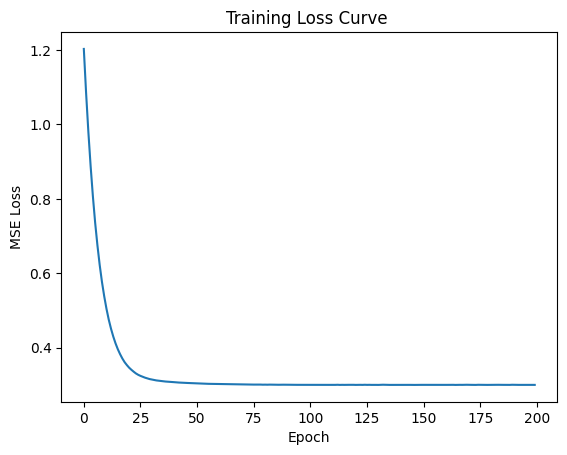

In [ ]:
def train(model, train_loader, n_epochs=200):
    # model.parameters() tells the optimizer which weights to optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001) 

    losses = []


    # An epoch is one full pass through the training data. We will train for 200 epochs.
    for epoch in range(n_epochs):
        model.train()  
        epoch_loss = 0
        # in each epoch, we iterate over mini-batches from the DataLoader
        for X_batch, y_batch in train_loader:
            # Need to reset the gradients before running the backward pass.
            optimizer.zero_grad()   

            #TODO: Compute the gradient of the loss.
            #TIP: Combine gradient calculation with the model forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item() * X_batch.size(0)        # for statistics

        epoch_loss /= len(train_loader.dataset)
        losses.append(epoch_loss)

        if (epoch+1) % 20 == 0:
            print(f"Epoch {epoch+1}/{n_epochs}, Loss: {epoch_loss:.4f}")

    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title('Training Loss Curve ')
    plt.show()

train(model, train_loader)

## Step 6: Test

Remember that we loaded two datasets in the beginning. 

The **training set** is used to fit the model parameters—this is the data the model "sees" and learns from during training. The **test set** is kept separate and is only used after training to evaluate how well the model generalizes to new, unseen data. This helps us estimate the real-world performance of our model. In the end, we only really interested in the error on the test set, since we only care about getting predictions for inputs for which we don't have the true, experimental output in our training data.

In a proper machine learning workflow, you would also set aside a **validation set**. The validation set is used during model development to tune hyperparameters (like learning rate, number of layers, or neurons) and to prevent overfitting. You should only use the test set once, after all model choices are finalized, to get an unbiased estimate of performance.

Test MSE (normalized): 0.2495
Test R2 (normalized): 0.7029


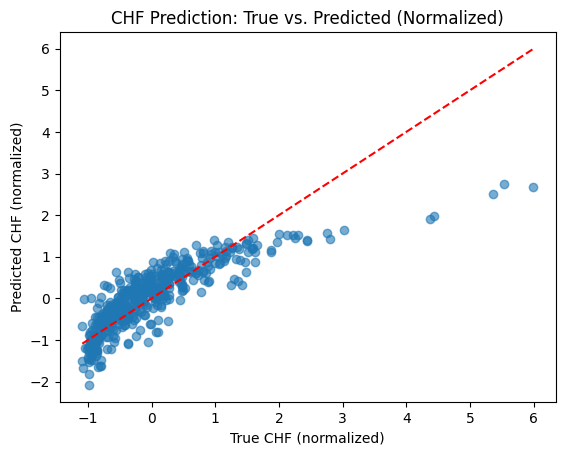

In [35]:
def test(model, test_loader):
    model.eval()  # Set model to evaluation mode
    y_test_true_list = []
    y_test_pred_list = []

    with torch.no_grad():
        # TODO: Iterate over the test_loader and collect predictions and true values
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            y_test_pred_list.append(y_pred.numpy())
            y_test_true_list.append(y_batch.numpy())

    y_test_pred = np.vstack(y_test_pred_list)
    y_test_true = np.vstack(y_test_true_list)

    # Calculate metrics in normalized space
    mse = np.mean((y_test_true - y_test_pred) ** 2)
    r2 = 1 - np.sum((y_test_true - y_test_pred) ** 2) / np.sum((y_test_true - np.mean(y_test_true)) ** 2)
    print(f"Test MSE (normalized): {mse:.4f}")
    print(f"Test R2 (normalized): {r2:.4f}")

    plt.scatter(y_test_true, y_test_pred, alpha=0.6)
    plt.xlabel('True CHF (normalized)')
    plt.ylabel('Predicted CHF (normalized)')
    plt.title('CHF Prediction: True vs. Predicted (Normalized)')
    plt.plot([y_test_true.min(), y_test_true.max()], [y_test_true.min(), y_test_true.max()], 'r--')
    plt.show()

test(model, test_loader)

## Step 7: A true neural network

As you can see, the training error is quite high. The simple linear model is not able to predict the targets since the true target function is not linear. This is also called underfitting - the model is not expressive enough to follow the training distribution.

A true neural network is not just a single linear layer - it should at least contain one *activation function*. A simple feed-forward-network consists of a sequence of linear layers and activation functions. The standard ReLu function for example simply implements a max: relu(x) = max(0, x). This non-linear layer allows the network to represent non-linear, complex functions. The Relu layer in Pytorch is *nn.ReLU()*.

You should increase the output dimension of the first linear layer to e.g. 32. This is called the hidden dimension - we lift the data to a higher-dimensional space to make computations easier in the neural network. 

**TODO:** Implement the `CHFNeuralNetwork'. You should use three layers:
1. A linear input layer that takes in the 6 input featuers and transform into the hidden_dim.
2. The RelU activation function.
3. A second linear layer to project from the hidden_dim to the single output.




Epoch 20/200, Loss: 0.1169
Epoch 40/200, Loss: 0.0790
Epoch 60/200, Loss: 0.0600
Epoch 80/200, Loss: 0.0497
Epoch 100/200, Loss: 0.0425
Epoch 120/200, Loss: 0.0389
Epoch 140/200, Loss: 0.0356
Epoch 160/200, Loss: 0.0335
Epoch 180/200, Loss: 0.0309
Epoch 200/200, Loss: 0.0297


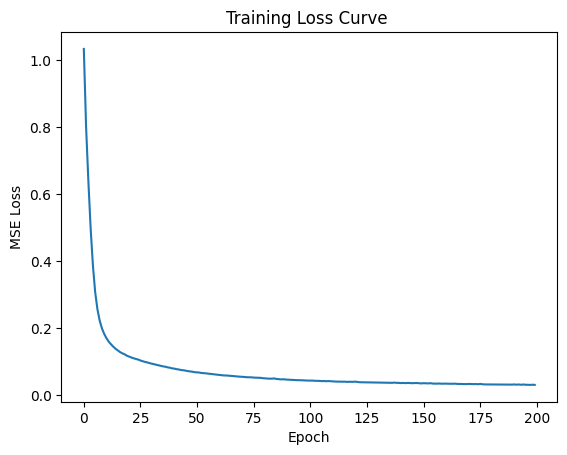

Test MSE (normalized): 0.0229
Test R2 (normalized): 0.9727


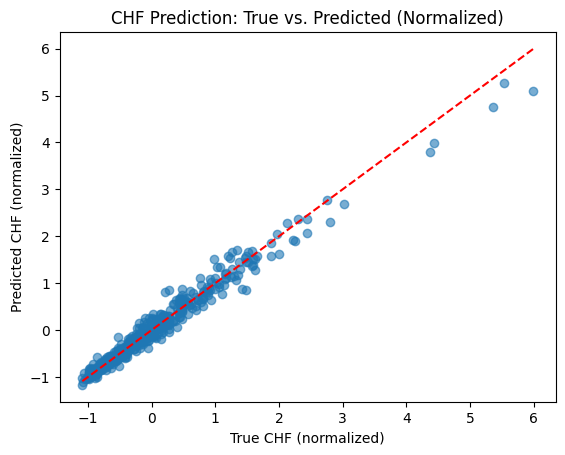

In [36]:
class CHFNeuralNetwork(nn.Module):
    def __init__(self, hidden_dim=32):
        super().__init__()
        # A single linear layer. The first argument is the number of input features (6), 
        # and the second is the number of outputs (1) in the CHF example.
        self.linear_layer = nn.Linear(6, hidden_dim)
        self.non_linearity = nn.ReLU()
        self.out_layer = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out = self.linear_layer(x)
        out = self.non_linearity(out)
        out = self.out_layer(out)
        return out

model = CHFNeuralNetwork()
train(model, train_loader)
test(model, test_loader)

## Step 8: Overfitting and Underfitting


**Underfitting** occurs when a model is too simple to capture the underlying patterns in the data. In our tutorial, the previous linear model is an example of underfitting: it cannot represent the complex, nonlinear relationship between the input features and the target variable (CHF). As a result, both the training and test errors remain high, and the model fails to make accurate predictions even on the data it was trained on.

**Overfitting** happens when a model is too complex relative to the amount of available data. It learns not only the underlying patterns but also the noise in the training set, resulting in excellent performance on the training data but poor generalization to new, unseen data.

In the following, we will simulate overfitting by using a larger model with only a subset of the dataset. See how the training loss compares to the last model above, and how the test loss changes.


Epoch 20/2000, Loss: 0.1932
Epoch 40/2000, Loss: 0.1216
Epoch 60/2000, Loss: 0.0726
Epoch 80/2000, Loss: 0.0427
Epoch 100/2000, Loss: 0.0246
Epoch 120/2000, Loss: 0.0142
Epoch 140/2000, Loss: 0.0085
Epoch 160/2000, Loss: 0.0054
Epoch 180/2000, Loss: 0.0037
Epoch 200/2000, Loss: 0.0027
Epoch 220/2000, Loss: 0.0021
Epoch 240/2000, Loss: 0.0017
Epoch 260/2000, Loss: 0.0013
Epoch 280/2000, Loss: 0.0011
Epoch 300/2000, Loss: 0.0009
Epoch 320/2000, Loss: 0.0007
Epoch 340/2000, Loss: 0.0006
Epoch 360/2000, Loss: 0.0005
Epoch 380/2000, Loss: 0.0004
Epoch 400/2000, Loss: 0.0003
Epoch 420/2000, Loss: 0.0003
Epoch 440/2000, Loss: 0.0002
Epoch 460/2000, Loss: 0.0002
Epoch 480/2000, Loss: 0.0002
Epoch 500/2000, Loss: 0.0002
Epoch 520/2000, Loss: 0.0002
Epoch 540/2000, Loss: 0.0002
Epoch 560/2000, Loss: 0.0001
Epoch 580/2000, Loss: 0.0001
Epoch 600/2000, Loss: 0.0001
Epoch 620/2000, Loss: 0.0001
Epoch 640/2000, Loss: 0.0001
Epoch 660/2000, Loss: 0.0001
Epoch 680/2000, Loss: 0.0001
Epoch 700/2000, Lo

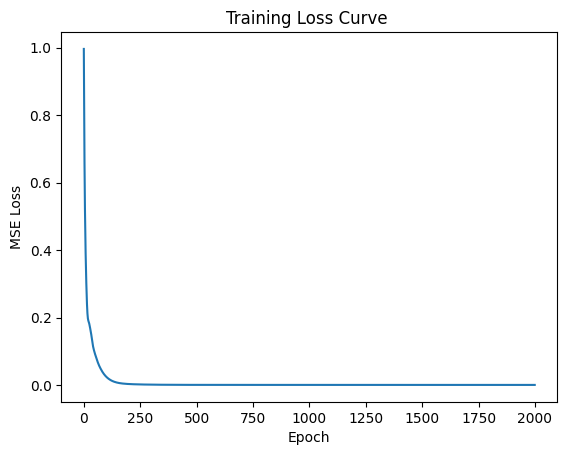

Test MSE (normalized): 0.1548
Test R2 (normalized): 0.8157


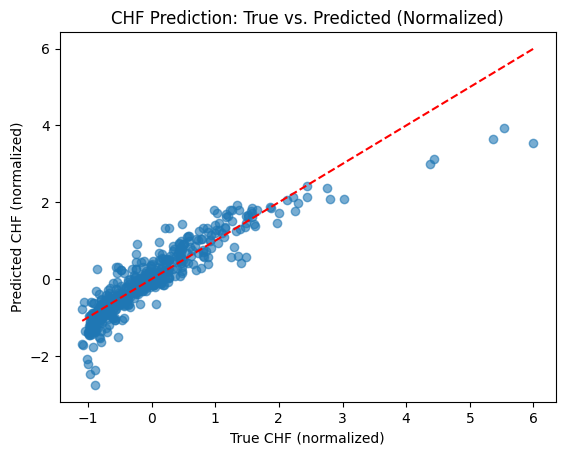

In [ ]:
model = CHFNeuralNetwork(512)


#TODO: create a new TensorDataset and dataloader
# Use only the first 50 samples from X_train_tensor and y_train_tensor
subset_xtrain = X_train_tensor[:50]
subset_ytrain = y_train_tensor[:50]

small_dataset = TensorDataset(subset_xtrain, subset_ytrain)
small_train_loader = DataLoader(small_dataset, batch_size=batch_size, shuffle=True)

assert len(small_dataset) == 50, "Small dataset should contain 50 samples"

train(model, small_train_loader, n_epochs=2000)
test(model, test_loader)

## Step 9: Experiment

Nice! We solved a real-world machine learning task with a simple neural network.

This is just the start - for a problem of this size you could also use different machine learning models (e.g. Gaussian Processess). Another thing to consider is model uncertainty - can we get a model that can estimate its own error on test inputs?